<a href="https://colab.research.google.com/github/crystal-zhu/Sitcom_Success_Factors-CSDS_312/blob/main/Friends_GenderDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cupy-cuda11x

ERROR: Operation cancelled by user


In [ ]:
import numpy as np


In [ ]:
import requests
import pandas as pd

dialogue = pd.read_csv("friends_data.csv")
dialogue = dialogue[1:]

columns_to_drop = ['season', 'episode', 'title']
dialogue.drop(columns=columns_to_drop, inplace=True)

dialogue

<ipython-input-5-a9933ab9ed6a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dialogue.drop(columns=columns_to_drop, inplace=True)


,character,dialogue
1,Monica,There's nothing to tell! He's just some guy\nI...
2,Joey,"C'mon, you're going out with the guy! There's\..."
3,Chandler,"All right Joey, be\nnice. So does he have a h..."
4,Phoebe,"Wait, does he eat chalk?"
5,Phoebe,"Just, 'cause, I don't want her to go through\n..."
...,...,...
59395,Chandler,"Oh, it's gonna be okay."
59396,Rachel,(crying) Do you guys have to go to the new hou...
59397,Monica,We got some time.
59398,Rachel,"Okay, should we get some coffee?"


In [ ]:
female_chars = ['Rachel', 'Monica', 'Phoebe']
male_chars = ['Joey', 'Ross', 'Chandler']

In [ ]:
for char in female_chars:
  female_lines = dialogue[dialogue['character'] == char]
  print(char + ": " + str(len(female_lines)))


Rachel: 8488
Monica: 7643
Phoebe: 6816


In [ ]:
for char in male_chars:
  male_lines = dialogue[dialogue['character'] == char]
  print(char + ": " + str(len(male_lines)))


Joey: 7565
Ross: 8387
Chandler: 7689


In [ ]:
import re
import nltk

from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
nlp

# Initialize the Porter Stemmer and WordNet Lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Gensim stopwords
gensim_stop_words = set(stopwords.words('english'))

# Remove punctuations, stopwords, convert to lowercase, tokenize, stem, and lemmatize
def preprocess_text(text):
    # Use spaCy for POS tagging
    processed = nlp(text)
    cleaned_text = re.sub(r'[^\w\s]', '', text) # remove all non-word and non-whitespace characters from the text

    # Keep only nouns
    nouns = [token.text for token in processed if token.pos_ in ["NOUN", "VERB", "ADVERB", "DET", "X"]]

    stop_words = set(gensim_stop_words)
    words = word_tokenize(cleaned_text.lower())
    filtered_words = [word for word in words if word not in stop_words and len(word) >= 4] # remove words have less than 4 characters

    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]

    return nouns

# Apply preprocessing to the 'text' column
dialogue['processed_text'] = dialogue['dialogue'].fillna('').apply(preprocess_text)
dialogue.head()



,character,dialogue,processed_text
1,Monica,There's nothing to tell! He's just some guy\nI...,"['s, tell, some, guy, work]"
2,Joey,"C'mon, you're going out with the guy! There's\...","[C'm, going, the, guy, 's, got]"
3,Chandler,"All right Joey, be\nnice. So does he have a h...","[have, a, hump, A, hump, a, hairpiece]"
4,Phoebe,"Wait, does he eat chalk?","[Wait, eat, chalk]"
5,Phoebe,"Just, 'cause, I don't want her to go through\n...","[want, go, went]"


In [ ]:
# Function to determine gender based on character name
def get_gender(name):
    if name in female_chars:
        return 'Female'
    elif name in male_chars:
        return 'Male'
    else:
        return None

# Apply the function to create a new column 'Gender' in the DataFrame
dialogue['Gender'] = dialogue['character'].apply(get_gender)

# Display the DataFrame with the new column
dialogue.head()

,character,dialogue,processed_text,Gender
1,Monica,There's nothing to tell! He's just some guy\nI...,"['s, tell, some, guy, work]",Female
2,Joey,"C'mon, you're going out with the guy! There's\...","[C'm, going, the, guy, 's, got]",Male
3,Chandler,"All right Joey, be\nnice. So does he have a h...","[have, a, hump, A, hump, a, hairpiece]",Male
4,Phoebe,"Wait, does he eat chalk?","[Wait, eat, chalk]",Female
5,Phoebe,"Just, 'cause, I don't want her to go through\n...","[want, go, went]",Female


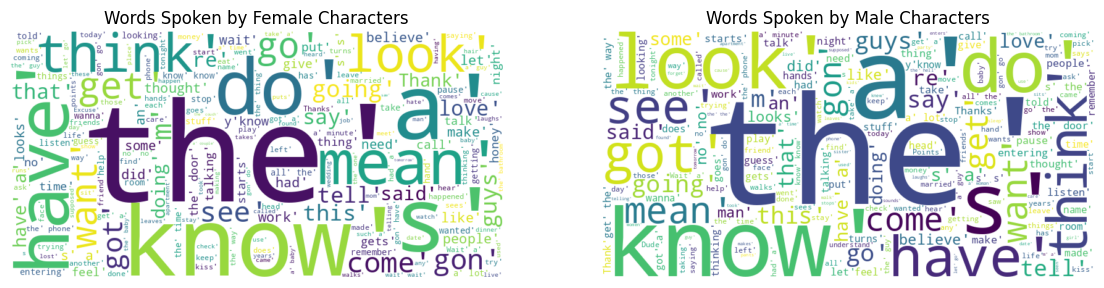

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate lines spoken by female characters
female_lines_concatenated = ' '.join(dialogue[dialogue['Gender'] == 'Female']['processed_text'].dropna().astype(str))

# Concatenate lines spoken by male characters
male_lines_concatenated = ' '.join(dialogue[dialogue['Gender'] == 'Male']['processed_text'].dropna().astype(str))

# # Generate word clouds for female and male characters
female_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(female_lines_concatenated)
male_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(male_lines_concatenated)

# # Plot the word clouds
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(female_wordcloud, interpolation='bilinear')
plt.title('Words Spoken by Female Characters')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(male_wordcloud, interpolation='bilinear')
plt.title('Words Spoken by Male Characters')
plt.axis('off')

plt.show()

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis on a string
def analyze_sentiment(text):
    # Get sentiment scores
    scores = sid.polarity_scores(text)
    # Determine sentiment based on compound score
    if scores['compound'] >= 0.05:

        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

def get_sentiment_score(text):
    # Get sentiment scores
    scores = sid.polarity_scores(text)
    # Return the compound score
    return scores['compound']

# Apply sentiment analysis to each text in the DataFrame
dialogue['Sentiment'] = dialogue['dialogue'].fillna('').apply(analyze_sentiment)
dialogue['SentimentScore'] = dialogue['dialogue'].fillna('').apply(get_sentiment_score)

dialogue

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,character,dialogue,processed_text,Gender,Sentiment,SentimentScore
1,Monica,There's nothing to tell! He's just some guy\nI...,"['s, tell, some, guy, work]",Female,Neutral,0.0000
2,Joey,"C'mon, you're going out with the guy! There's\...","[C'm, going, the, guy, 's, got]",Male,Negative,-0.5696
3,Chandler,"All right Joey, be\nnice. So does he have a h...","[have, a, hump, A, hump, a, hairpiece]",Male,Positive,0.4871
4,Phoebe,"Wait, does he eat chalk?","[Wait, eat, chalk]",Female,Neutral,0.0000
5,Phoebe,"Just, 'cause, I don't want her to go through\n...","[want, go, went]",Female,Negative,-0.1316
...,...,...,...,...,...,...
59395,Chandler,"Oh, it's gonna be okay.",[gon],Male,Positive,0.2263
59396,Rachel,(crying) Do you guys have to go to the new hou...,"[crying, guys, have, go, the, house, have, som...",Female,Neutral,0.0000
59397,Monica,We got some time.,"[got, some, time]",Female,Neutral,0.0000
59398,Rachel,"Okay, should we get some coffee?","[get, some, coffee]",Female,Positive,0.2263


In [ ]:
average_sentiment = dialogue.groupby('Gender')['SentimentScore'].mean()

print("Average sentiment score for male and female dialogue:")
print(average_sentiment)

Average sentiment score for male and female dialogue:
Gender
Female    0.135775
Male      0.124793
Name: SentimentScore, dtype: float64


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


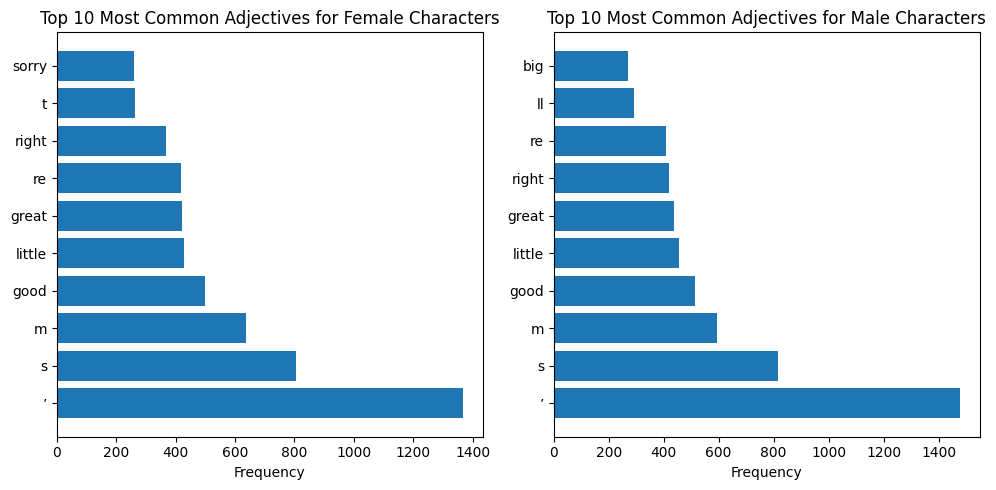

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to extract adjectives from text based on gender
def extract_adjectives(text, gender):
    words = word_tokenize(text)
    tagged_words = pos_tag(words)
    adjectives = [word for word, pos in tagged_words if pos == 'JJ' and dialogue.loc[dialogue['dialogue'] == text, 'Gender'].iloc[0] == gender]
    return adjectives

# Extract adjectives for female and male characters
female_adjectives = [adjective for text in dialogue[dialogue['Gender'] == 'Female']['dialogue'] if isinstance(text, str) for adjective in extract_adjectives(text, 'Female') if adjective]
male_adjectives = [adjective for text in dialogue[dialogue['Gender'] == 'Male']['dialogue'] if isinstance(text, str) for adjective in extract_adjectives(text, 'Male') if adjective]

# Count the occurrence of each adjective
female_adjectives_counts = Counter(female_adjectives)
male_adjectives_counts = Counter(male_adjectives)

# Sort adjectives based on their frequency
most_common_female_adjectives = female_adjectives_counts.most_common()
most_common_male_adjectives = male_adjectives_counts.most_common()

# print("Most commonly used adjectives for female characters:")
# for adj, count in most_common_female_adjectives:
#     print(adj, "-", count)

# print("\nMost commonly used adjectives for male characters:")
# for adj, count in most_common_male_adjectives:
#     print(adj, "-", count)


top_female_adjectives = dict(female_adjectives_counts.most_common(10))
top_male_adjectives = dict(male_adjectives_counts.most_common(10))

# Plot bar graphs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.barh(range(len(top_female_adjectives)), list(top_female_adjectives.values()), align='center')
plt.yticks(range(len(top_female_adjectives)), list(top_female_adjectives.keys()))
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Adjectives for Female Characters')

plt.subplot(1, 2, 2)
plt.barh(range(len(top_male_adjectives)), list(top_male_adjectives.values()), align='center')
plt.yticks(range(len(top_male_adjectives)), list(top_male_adjectives.keys()))
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Adjectives for Male Characters')

plt.tight_layout()
plt.show()